In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
%cd '/content/gdrive/My Drive/PDEU/Pattern recognition and machine learning/data'

/content/gdrive/My Drive/PDEU/Pattern recognition and machine learning/data


In [4]:
k = 2

##**Date preparation**

In [5]:
df = pd.read_csv('wine.data', header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X = np.array(df.drop(["Class label"], axis=1))
Y = df["Class label"]

##**Train-Test Split**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

##**Standardization**

In [8]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##**Calculate $cov(X_0)$**

In [9]:
X_cov = np.cov(X_train_std.T)

##**Solve $cov(X_0)$**

In [10]:
eigval, eigvec = np.linalg.eig(X_cov)
eigvec = eigvec.T

In [11]:
eigvec = eigvec[np.argsort(eigval)[::-1]]
eigval = eigval[np.argsort(eigval)[::-1]]

##**Explained variance ratio**

In [12]:
total_var = 0

evr = []
for i in range(13):
  total_var += eigval[i]
  evr.append(eigval[i])

In [13]:
evr = np.array(evr)
evr = (evr/total_var)*100

cum_evr = np.cumsum(evr)

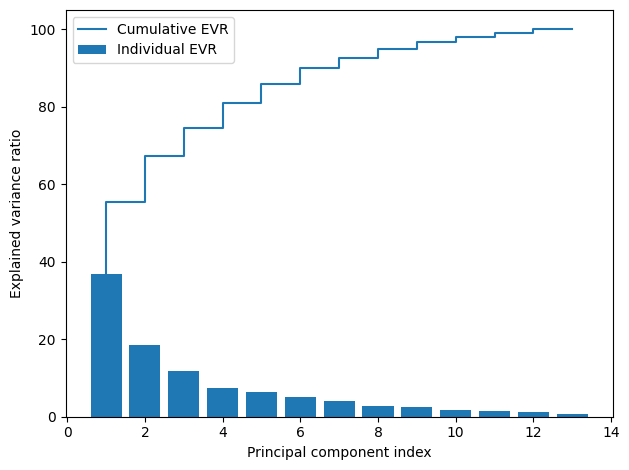

In [14]:
plt.bar(range(1,14), evr, label="Individual EVR")
plt.step(range(1,14), cum_evr, label="Cumulative EVR")

plt.xlabel("Principal component index")
plt.ylabel("Explained variance ratio")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

##**Perform PCA**

In [15]:
W = eigvec[:2]
W = np.array(W)

In [16]:
print(W)

[[-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952
  -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022
  -0.29669651]
 [ 0.50303478  0.16487119  0.24456476 -0.11352904  0.28974518  0.05080104
  -0.02287338  0.09048885  0.00835233  0.54977581 -0.20716433 -0.24902536
   0.38022942]]


In [17]:
X_hat_train = np.dot(X_train_std, W.T)
X_hat_test = np.dot(X_test_std, W.T)

##**Plot results**

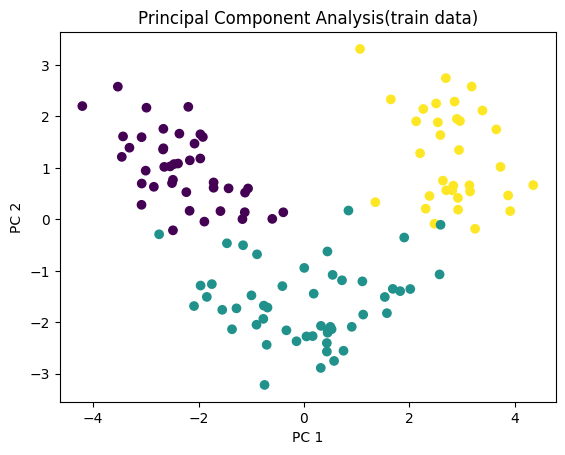

In [18]:
scatter = plt.scatter(X_hat_train[:, 0], X_hat_train[:, 1], c=Y_train)

plt.title("Principal Component Analysis(train data)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.show()

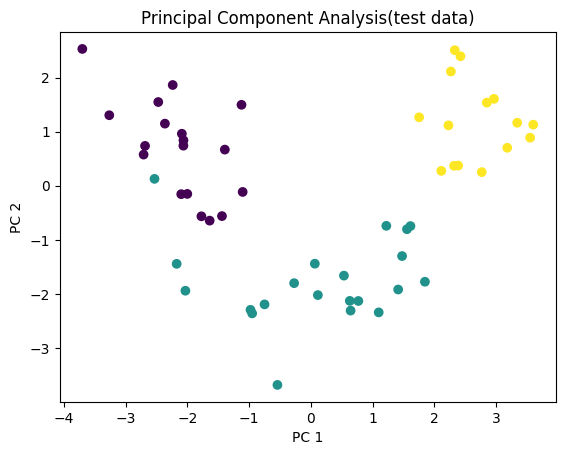

In [19]:
scatter = plt.scatter(X_hat_test[:, 0], X_hat_test[:, 1], c=Y_test)

plt.title("Principal Component Analysis(test data)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.show()